# Import Dataset

In [54]:
import pandas as pd
import numpy as np
from os import path

data_path = path.join('..','dataset','financialData.csv')
data = pd.read_csv(data_path)
print(data.head()) 

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


# Data Preprocessing

## import libraries

In [55]:
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')

## Check for Null values

In [56]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


## See distribution of positive vs negative target classes (isFraud (1) vs nortFraud (0))

In [57]:
All = data.shape[0]
# print(All)

In [58]:
fraud = data[data['isFraud'] == 1]
notFraud = data[data['isFraud'] == 0]

x = len(fraud)/All
y = len(notFraud)/All

print(f"fraud rate is {x*100}%")
print(f"notFraud rate is {y*100}%")

fraud rate is 0.12908204481801522%
notFraud rate is 99.87091795518198%


0    6354407
1       8213
Name: isFraud, dtype: int64


([<matplotlib.axis.XTick at 0x7fd8319f7790>,
 [Text(0, 0, 'notFraud'), Text(1, 0, 'Fraud')])

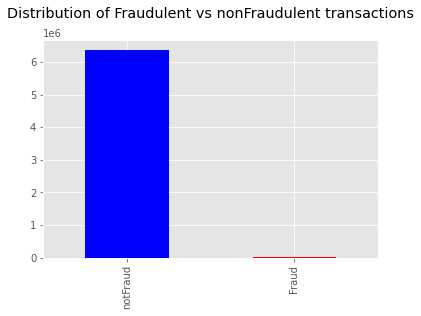

In [59]:
# Plotting the results above
labels = ['notFraud', 'fraud']
classes = pd.value_counts(data['isFraud'], sort = True)
print(classes)
classes.plot.bar(color = ['blue','red'],subplots=True)
plt.title('Distribution of Fraudulent vs nonFraudulent transactions\n')
plt.xticks(np.arange(2),('notFraud','Fraud'))

## Plotting distribution of features

In [60]:
# amount = data['amount']
# # print(amount.name)
# plt.figure(figsize=(15,8))
# sns.distplot(amount)


In [61]:
# oldbalanceOrg = data['oldbalanceOrg']
# plt.figure(figsize=(15,8))
# sns.distplot(oldbalanceOrg)

In [62]:
# newbalanceOrig = data['newbalanceOrig']
# plt.figure(figsize=(15,8))
# sns.distplot(newbalanceOrig)

### See distribution of transaction types

In [63]:
data_type = data["type"].value_counts()
transactions = data_type.index
quantity = data_type.values

figure = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Distribution of Transaction Type")
figure.show()

## See feature correlation with target column (isFraud)

In [64]:
# Checking correlation
correlation = data.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


## Transforming categorical feature (type) to numeric representation 

In [65]:
# ONE HOT ENCODING
# generate binary balues using get_dummies
dum_df = pd.get_dummies(data['type'],prefix='transactionType',prefix_sep=':')
dum_df.head()
# replacing the type column with the columns generated above
del data['type']
data.head()
data = data.join(dum_df)

In [66]:
# change isFraud to text
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
data.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,transactionType:CASH_IN,transactionType:CASH_OUT,transactionType:DEBIT,transactionType:PAYMENT,transactionType:TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0,0,0,0,1,0


## Splitting the data

In [67]:
# import libraries
from sklearn.model_selection import train_test_split
# select the features that will be used by the model by dropping some of the unwanted columns
labels = ['step','nameOrig','nameDest','oldbalanceDest','newbalanceDest','isFlaggedFraud']
dataForModel = data.drop(columns=labels)
dataForModel.head()

,amount,oldbalanceOrg,newbalanceOrig,isFraud,transactionType:CASH_IN,transactionType:CASH_OUT,transactionType:DEBIT,transactionType:PAYMENT,transactionType:TRANSFER
0,9839.64,170136.0,160296.36,No Fraud,0,0,0,1,0
1,1864.28,21249.0,19384.72,No Fraud,0,0,0,1,0
2,181.00,181.0,0.00,Fraud,0,0,0,0,1
3,181.00,181.0,0.00,Fraud,0,1,0,0,0
4,11668.14,41554.0,29885.86,No Fraud,0,0,0,1,0


In [68]:
# move target column to the end of dataframe
target = dataForModel.pop('isFraud')
dataForModel.insert(len(dataForModel.columns),target.name,target)
dataForModel.head()

,amount,oldbalanceOrg,newbalanceOrig,transactionType:CASH_IN,transactionType:CASH_OUT,transactionType:DEBIT,transactionType:PAYMENT,transactionType:TRANSFER,isFraud
0,9839.64,170136.0,160296.36,0,0,0,1,0,No Fraud
1,1864.28,21249.0,19384.72,0,0,0,1,0,No Fraud
2,181.00,181.0,0.00,0,0,0,0,1,Fraud
3,181.00,181.0,0.00,0,1,0,0,0,Fraud
4,11668.14,41554.0,29885.86,0,0,0,1,0,No Fraud


In [69]:
X = dataForModel.iloc[:, :-1].values
y = dataForModel.iloc[:, -1].values

In [70]:
print(X)

[[9.83964000e+03 1.70136000e+05 1.60296360e+05 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [1.86428000e+03 2.12490000e+04 1.93847200e+04 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [1.81000000e+02 1.81000000e+02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [6.31140928e+06 6.31140928e+06 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.50002520e+05 8.50002520e+05 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [8.50002520e+05 8.50002520e+05 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [71]:
print(y)

['No Fraud' 'No Fraud' 'Fraud' ... 'Fraud' 'Fraud' 'Fraud']


In [72]:
# perform split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# DECISION TREE: Initialize and train model  

## import libraries

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score

## Train Model

In [74]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
print(f"{model.score(X_test,y_test)*100:.2f}%")

99.97%


### Initial Results analysis

Although this accuracy score is very high, I realized that the target class is highly imbalanced in favour of "no Fraud". Therefore I will choose a more suitable metric than accuracy score

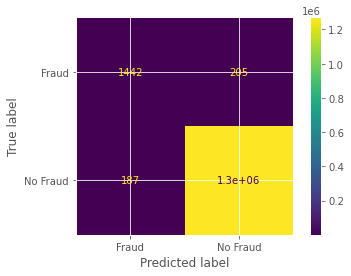

In [47]:
# First we can take a look at the confusion matrix
plot_confusion_matrix(model, X_test,y_test)
plt.show()


Within the context of credit card fraud we are concerned with the model performance metrics or accuracy for the positive class, therefore I will compute the sensitivity metric. At first glance we can extract from the confusion matrix that the sensitivity it is less accurate than the accuracy score of 99.97% above. 

In [53]:
print(f"The recall score is {recall_score(y_true=y_test,  y_pred=model.predict(X_test),pos_label='Fraud')*100:.2f}%")

The recall score is 87.55%


From here we could investigate other models that can perform better on the recall metric. However due to the **very** large number of samples and time overhead on fitting/testing models I decided to solve the class imbalance problem via data-level methods instead, i.e. undersampling 